In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import pickle

import warnings
warnings.filterwarnings('ignore')


## DATA CLEANING AND PREPROCESSING

In [2]:
df = pd.read_csv('california_housing.csv')
df.head()
input_data = (-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0)
data = np.array (input_data)

input_data_reshaped = data.reshape(1, -1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.dropna(inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.shape

(20433, 10)

In [8]:
df.duplicated().sum()

0

In [9]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## MAPPING

In [10]:
df['ocean_proximity'] = df['ocean_proximity'].map({"NEAR BAY": 0,  "<1H OCEAN": 1, "INLAND": 2, "NEAR OCEAN": 3, "ISLAND": 4,})

In [11]:
# df.ocean_proximity.isnull().sum()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [12]:
df.shape

(20433, 10)

## EDA

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

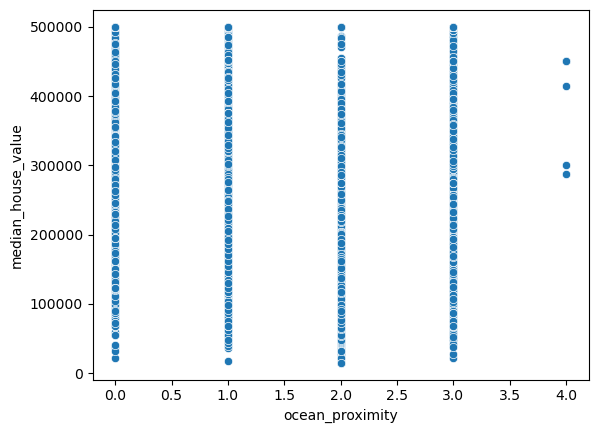

In [13]:
sns.scatterplot(x = 'ocean_proximity', y = 'median_house_value', data = df)

<Axes: xlabel='longitude', ylabel='Count'>

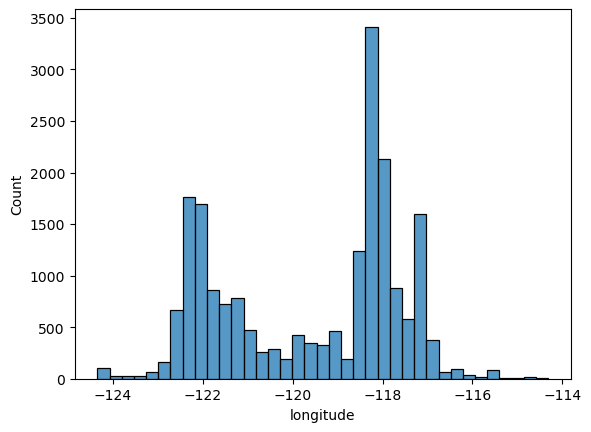

In [14]:
sns.histplot(df['longitude'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

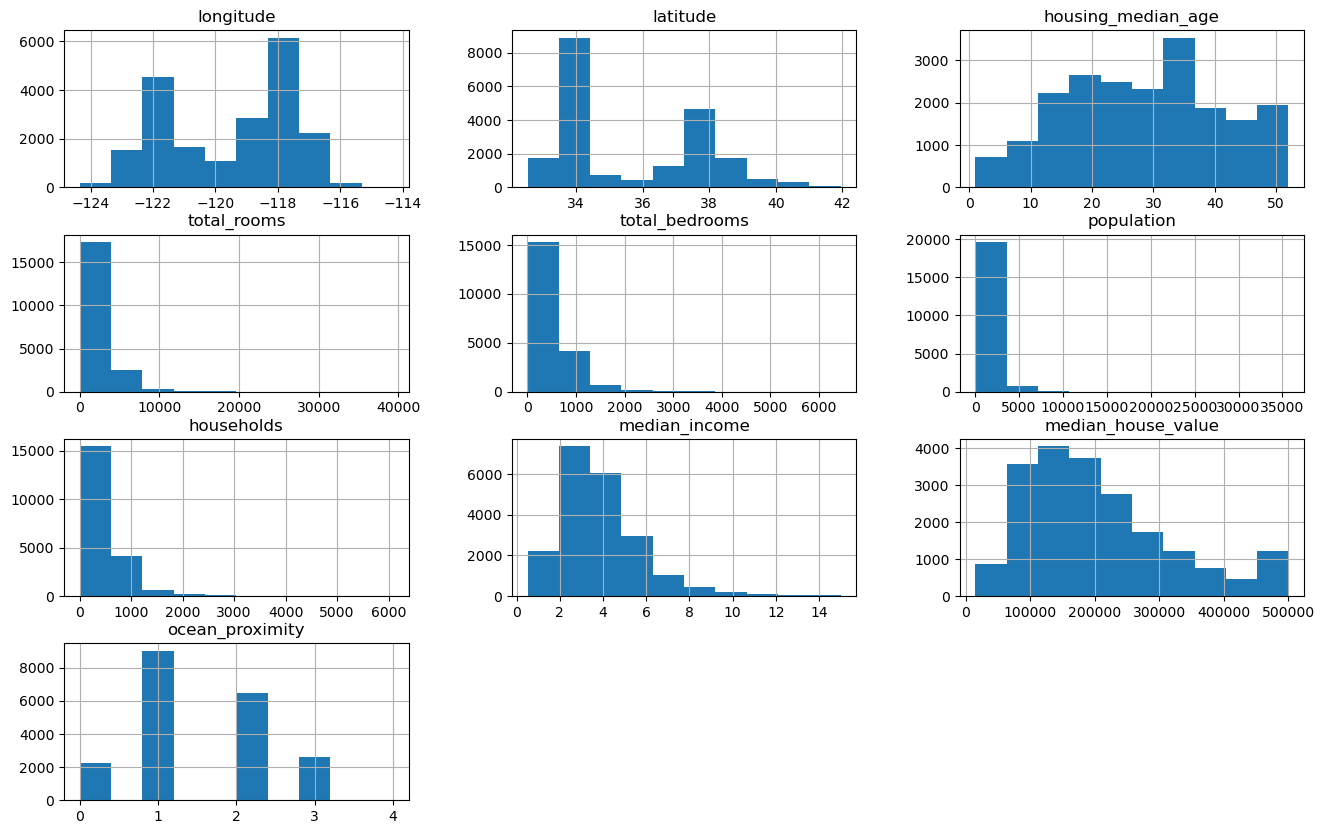

In [15]:
df.hist(figsize = (16,10))

In [16]:
list(df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [17]:
target = 'median_house_value'
y = df[target]
df.drop(columns = ['median_house_value'], inplace = True)
features = list(df.columns)

In [18]:
x = df[features]
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [19]:
df.dropna(inplace = True)

## SPLITING DATA AND CREATING MODEL FOR PREDICTION

In [20]:
from sklearn.model_selection import train_test_split
print(x.shape,y.shape)
y.isnull().sum()

(20433, 9) (20433,)


0

In [21]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state = 5)

In [22]:
print (x.shape, x_train.shape, x_test.shape)

(20433, 9) (16346, 9) (4087, 9)


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
lr.fit (x_train, y_train)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor ()
rf.fit (x_train, y_train)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor ()
gbr.fit (x_train, y_train)

from xgboost import XGBRegressor
xg = XGBRegressor ()
xg.fit (x_train, y_train)

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit (x_train, y_train)


DecisionTreeRegressor()

In [24]:
print ('Linear Regression Train Score is', lr.score (x_train, y_train)* 100)
print ('Random Forest Regression Train Score is', rf.score (x_train, y_train)* 100)
print ('Gradient Boosting Regression Train Score is', gbr.score (x_train, y_train)* 100)
print ('XGBoost Regression Train Score is', xg.score (x_train, y_train)* 100)
print ('Decision Tree Regression Train Score is', tree.score (x_train, y_train)* 100)

Linear Regression Train Score is 63.89871018983706
Random Forest Regression Train Score is 97.41014394073306
Gradient Boosting Regression Train Score is 78.5430063800663
XGBoost Regression Train Score is 93.9087027535882
Decision Tree Regression Train Score is 100.0


In [25]:
print ('Linear classifier Test Score is', lr.score (x_test, y_test) * 100)
print ('Random Forest classifier Test Score is', rf.score (x_test, y_test)* 100)
print ('Gradient Boosting classifier Test Score is', gbr.score (x_test, y_test)* 100)
print ('XGBoost classifier Test Score is', xg.score (x_test, y_test)* 100)
print ('Decision Tree classifier Test Score is', tree.score (x_test, y_test)* 100)

Linear classifier Test Score is 63.050450911848955
Random Forest classifier Test Score is 81.07673281609384
Gradient Boosting classifier Test Score is 76.00972016627239
XGBoost classifier Test Score is 83.1659106408593
Decision Tree classifier Test Score is 64.19376858529358


In [26]:
xg.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
y_pred = lr.predict (x_test)
y_pred2 = rf.predict (x_test)
y_pred3 = gbr.predict (x_test)
y_pred4 = xg.predict (x_test)
y_pred5 = tree.predict (x_test)

In [28]:
y_pred

array([123215.23443817, 273610.14841711, 252368.29776225, ...,
       155423.09264315, 179915.6529015 , 211647.07568301])

In [29]:
y_pred2

array([122664.  , 237250.04, 313013.  , ..., 154060.  , 141421.  ,
       261537.02])

In [30]:
y_pred3

array([ 96679.31793167, 250070.84555377, 290449.17115485, ...,
       162989.44913442, 145786.86085208, 243091.55173281])

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [32]:
model = joblib.load ('California Housing Model')

In [33]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)

Shape of x_train (16346, 9)
Shape of x_test (4087, 9)


In [35]:
y_pred

array([123215.23443817, 273610.14841711, 252368.29776225, ...,
       155423.09264315, 179915.6529015 , 211647.07568301])

In [36]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [37]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0


In [38]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [39]:
sc_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [40]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[sc_cols] = scaler.fit_transform (df[sc_cols])
y = scaler.fit_transform(y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
df.head()

### PEFORMANCE MATRIX

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

In [ ]:
# xg.predict(input_data)
# x_train.shape

## SAVING USING JOBLIB

In [ ]:
import joblib

In [ ]:
joblib.dump (xg, 'California Housing Model')

In [ ]:
model = joblib.load ('California Housing Model')

In [ ]:
model.predict(x_test)

In [ ]:
xg.predict(x_test)

In [43]:
with open('Carlifonia Housing Prediction Model.sav', 'wb') as file:
    pickle.dump(xg, file)